In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# set the option to display all columns
pd.set_option('display.max_columns', None)

## Original tweets

In [2]:
df = pd.read_csv('sample.csv')

In [3]:
df.head(5)

,id,author_id,in_reply_to_user_id,quoted_user_id,retweeted_user_id,text,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,entities.hashtags,entities.mentions,author.username,author.name,author.description,author.location,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,url,link_text,party,name,Occupation(s),Education,Residence[5],gpt_sentiment,age,gender,bert_sentiment
0,1174499599181959168,262192574,NaN,NaN,NaN,We should never forget the sacrifices made by ...,22,0,0,2,NaN,NaN,cindyhydesmith,Cindy Hyde-Smith,Lifelong conservative proudly fighting for the...,"Mississippi, USA",20222,199,2232,https://www.wdam.com/2019/09/18/senator-cindy-...,MISSISSIPPI (WLOX) - U.S. Senator Cindy Hyde-S...,Republican,Cindy Hyde-Smith,Lobbyist Farmer,Copiah-Lincoln Community College (AA) Universi...,Brookhaven,positive,65,female,positive
1,1320738770543628288,15808765,NaN,NaN,NaN,It's no secret what Donald Trump and Senate Re...,1494,67,264,323,NaN,NaN,CoryBooker,Cory Booker,U.S. Senator from New Jersey. Most tweets (and...,"Newark, NJ",4835171,85102,67749,https://thehill.com/homenews/administration/52...,President Trump says in an interview with “60 ...,Democrat,Cory Booker,Lawyer,"Stanford University (BA, MA) Queen's College, ...",Newark,negative,55,male,negative
2,998614598424068101,15745368,NaN,NaN,NaN,Some #Florida elections officials didn’t like ...,259,19,105,112,"[{""start"": 5, ""end"": 13, ""tag"": ""Florida""}, {""...","[{""start"": 77, ""end"": 82, ""username"": ""wapo"", ...",marcorubio,Marco Rubio,"Christian,Husband,Father,AMERICAN,Senator for ...",United States,4521052,2544,16594,https://www.washingtonpost.com/news/powerpost/...,Comment on this story Comment Gift Article Sha...,Republican,Marco Rubio,Lawyer,University of Florida (BA) University of Miami...,West Miami[13],neutral,53,male,negative
3,955084959840129024,13218102,NaN,NaN,NaN,"One woman, two marches: Can women who oppose a...",14,7,61,9,NaN,NaN,JohnCornyn,Senator John Cornyn,"Mainly news I find interesting, pics, and opin...","Austin, Texas",365745,12988,55006,https://www.dallasnews.com/opinion/commentary/...,Rachel Lamb saw as much fate as coincidence in...,Republican,John Cornyn,Lawyer,"Trinity University (BA) St. Mary's University,...",Austin,neutral,72,male,neutral
4,1255486188892422149,1080960924687704064,NaN,NaN,NaN,The coronavirus pandemic continues to highligh...,8,1,1,2,NaN,"[{""start"": 231, ""end"": 235, ""username"": ""FTC"",...",SenHawleyPress,Senator Hawley Press Office,Tweets from the office of U.S. Senator Josh Ha...,Missouri,58953,857,4437,https://www.kfvs12.com/2020/04/29/sen-hawley-c...,WASHINGTON D.C. (KFVS) - U.S. Senators Josh Ha...,Republican,Josh Hawley,Lawyer Professor,Stanford University (BA) Yale University (JD),Ozark,neutral,44,male,negative


## GPT-4

In [4]:
gpt4 = pd.read_csv('gpt4_full_merged.csv')

# filter outliers based on IQR 
gpt4 = gpt4[(gpt4['gpt4_simple'].str.len() >246) & (gpt4['gpt4_simple'].str.len() < 322)]

In [5]:
gpt4.head(2)

,id,author_id,in_reply_to_user_id,quoted_user_id,retweeted_user_id,text,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,entities.hashtags,entities.mentions,author.username,author.name,author.description,author.location,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,url,link_text,party,name,Occupation(s),Education,Residence[5],sentiment,age,gender,gpt4_simple,gpt4_simple_sentiment,gpt4_no_polit,gpt4_no_polit_label,gpt4_name,gpt4_name_label,gpt4_using,gpt4_using_label,gpt4_arg,gpt4_arg_label,gpt4_edu,gpt4_edu_label,gpt4_age,gpt4_age_label,gpt4_gender,gpt4_gender_label,text_text_emotion,text_emotion_score,gpt4_simple_text_emotion,gpt4_simple_emotion_score,gpt4_no_polit_text_emotion,gpt4_no_polit_emotion_score,gpt4_name_text_emotion,gpt4_name_emotion_score,gpt4_using_text_emotion,gpt4_using_emotion_score,gpt4_arg_text_emotion,gpt4_arg_emotion_score,gpt4_edu_text_emotion,gpt4_edu_emotion_score,gpt4_age_text_emotion,gpt4_age_emotion_score,gpt4_gender_text_emotion,gpt4_gender_emotion_score,gpt4_simple_bert_sentiment,gpt4_no_polit_bert_class,gpt4_using_bert_class,gpt4_arg_bert_class,gpt4_edu_bert_class,gpt4_gender_bert_class,gpt4_age_bert_class,gpt4_text_bert_class,gpt4_name_bert_class
0,1174499599181959168,262192574,NaN,NaN,NaN,We should never forget the sacrifices made by ...,22,0,0,2,NaN,NaN,cindyhydesmith,Cindy Hyde-Smith,Lifelong conservative proudly fighting for the...,"Mississippi, USA",20222,199,2232,https://www.wdam.com/2019/09/18/senator-cindy-...,MISSISSIPPI (WLOX) - U.S. Senator Cindy Hyde-S...,Republican,Cindy Hyde-Smith,Lobbyist Farmer,Copiah-Lincoln Community College (AA) Universi...,Brookhaven,positive,65,female,Honoring those who made the ultimate sacrifice...,positive,Honoring our Gold Star Families is crucial. Th...,positive,We must always honor the immense sacrifices of...,neutral,Honoring our Gold Star Families is a deeply co...,positive,Honoring our Gold Star Families is crucial. Th...,positive,Honoring Gold Star Families is a crucial remin...,positive,Honoring the bravery and sacrifice of our Gold...,positive,Honoring our fallen heroes means also supporti...,positive,sadness,0.531065,fear,0.402512,sadness,0.625089,neutral,0.389930,joy,0.694836,joy,0.643722,sadness,0.750784,joy,0.465563,fear,0.539729,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,1320738770543628288,15808765,NaN,NaN,NaN,It's no secret what Donald Trump and Senate Re...,1494,67,264,323,NaN,NaN,CoryBooker,Cory Booker,U.S. Senator from New Jersey. Most tweets (and...,"Newark, NJ",4835171,85102,67749,https://thehill.com/homenews/administration/52...,President Trump says in an interview with “60 ...,Democrat,Cory Booker,Lawyer,"Stanford University (BA, MA) Queen's College, ...",Newark,negative,55,male,"Trump's latest comments on ""60 Minutes"" reveal...",negative,"President Trump claims he has a ""fully develop...",negative,It's crystal clear: Donald Trump and Senate Re...,neutral,Striking down the ACA without a solid replacem...,negative,President Trump's empty promises are putting m...,negative,Dismantling the ACA without a clear and transp...,negative,President Trump's insistence on ending the ACA...,negative,Trump wants to dismantle the ACA but offers no...,negative,anger,0.914568,fear,0.980547,fear,0.932721,neutral,0.401858,fear,0.963931,fear,0.985529,fear,0.897719,fear,0.954932,fear,0.947733,negative,negative,negative,negative,negative,negative,negative,negative,negative


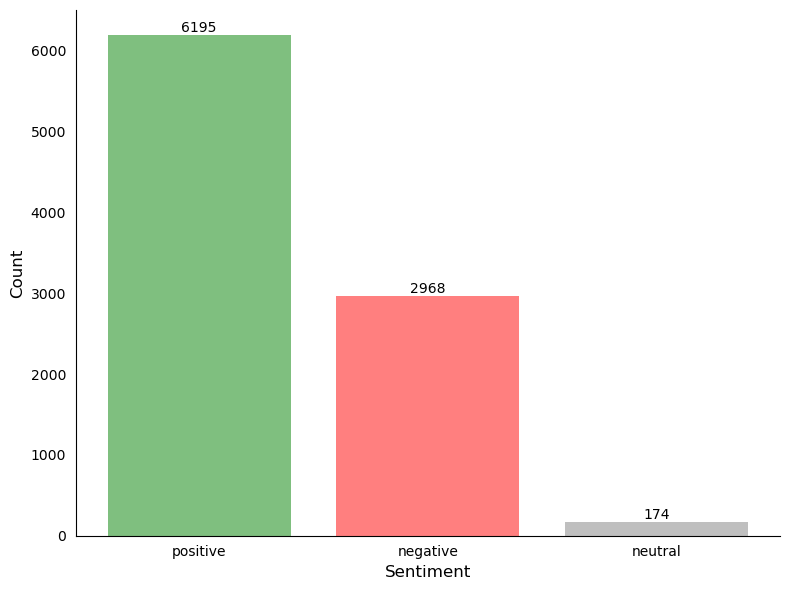

In [7]:
sentiment_counts = gpt4['gpt4_simple_sentiment'].value_counts()

# Define colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index], alpha = 0.5)  # Adjust bar colors
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks
plt.tick_params(axis='y', which='both', left=False)  # Remove y-axis ticks
plt.xlabel('Sentiment', fontsize=12)  # Add labels with increased font size
plt.ylabel('Count', fontsize=12)
#plt.title('Sentiment Distribution', fontweight='bold', fontsize=14)  # Add title with increased font size

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show();

In [8]:
true_values = gpt4['sentiment']
predicted_values = gpt4['gpt4_simple_sentiment']

# Calculate accuracy
accuracy_gpt4 = accuracy_score(true_values, predicted_values)

# Calculate precision, recall, and F1-score for each class
precision_gpt4 = precision_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
recall_gpt4 = recall_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
f1_gpt4 = f1_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])

# Calculate overall precision, recall, and F1-score
precision_macro_gpt4 = precision_score(true_values, predicted_values, average='macro')
recall_macro_gpt4 = recall_score(true_values, predicted_values, average='macro')
f1_macro_gpt4 = f1_score(true_values, predicted_values, average='macro')

# Print the results
print("Accuracy:", accuracy_gpt4)
print("Precision (positive, negative, neutral):", precision_gpt4)
print("Recall (positive, negative, neutral):", recall_gpt4)
print("F1-score (positive, negative, neutral):", f1_gpt4)
print("Overall Precision:", precision_macro_gpt4)
print("Overall Recall:", recall_macro_gpt4)
print("Overall F1-score:", f1_macro_gpt4)

Accuracy: 0.6790189568383849
Precision (positive, negative, neutral): [0.6448749  0.77021563 0.33908046]
Recall (positive, negative, neutral): [0.92263279 0.6275048  0.04325513]
F1-score (positive, negative, neutral): [0.75914489 0.69157465 0.07672302]
Overall Precision: 0.5847236641018275
Overall Recall: 0.531130910051757
Overall F1-score: 0.5091475194433758


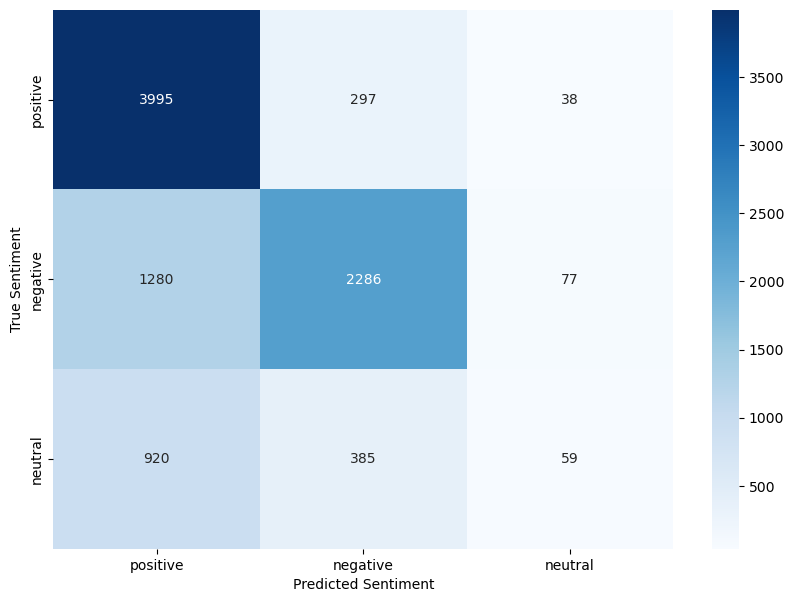

In [9]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_values, predicted_values, labels=['positive', 'negative', 'neutral'])
conf_matrix

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative', 'neutral'],
            yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
#plt.title('Confusion Matrix for GPT-4 generated text sentiment')
plt.show()

In [10]:
from scipy.stats import chi2_contingency

# Create a confusion matrix
confusion_matrix = pd.crosstab(pd.Series(true_values, name='Actual'), pd.Series(predicted_values, name='Predicted'))

print("Confusion Matrix:")
print(confusion_matrix)

# Perform the Chi-Squared Test
chi2, p, dof, ex = chi2_contingency(confusion_matrix)

print("\nChi-Squared Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Your model's predictions are significantly different from random chance.")
else:
    print("Fail to reject the null hypothesis. Your model's predictions are not significantly different from random chance.")


Confusion Matrix:
Predicted  negative  neutral  positive
Actual                                
negative       2286       77      1280
neutral         385       59       920
positive        297       38      3995

Chi-Squared Test Statistic: 2992.267947526924
Degrees of Freedom: 4
P-value: 0.0
Reject the null hypothesis. Your model's predictions are significantly different from random chance.


## GPT-3.5

In [11]:
gpt3 = pd.read_csv('gpt3_full_merged.csv')
# filter outliers based on IQR 
gpt3 = gpt3[(gpt3['gpt3_simple'].str.len() > 178) & (gpt3['gpt3_simple'].str.len() < 342)]

In [12]:
gpt3.head(2)

,id,author_id,in_reply_to_user_id,quoted_user_id,retweeted_user_id,text,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,entities.hashtags,entities.mentions,author.username,author.name,author.description,author.location,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,url,link_text,party,name,Occupation(s),Education,Residence[5],sentiment,age,gender,gpt3_simple,gpt3_simple_sentiment,gpt3_no_polit,gpt3_no_polit_label,gpt3_name,gpt3_name_label,gpt3_using,gpt3_using_label,gpt3_arg,gpt3_arg_label,gpt3_edu,gpt3_edu_label,gpt3_age,gpt3_age_label,gpt3_gender,gpt3_gender_label,text_text_emotion,text_emotion_score,gpt3_simple_text_emotion,gpt3_simple_emotion_score,gpt3_no_polit_text_emotion,gpt3_no_polit_emotion_score,gpt3_name_text_emotion,gpt3_name_emotion_score,gpt3_using_text_emotion,gpt3_using_emotion_score,gpt3_arg_text_emotion,gpt3_arg_emotion_score,gpt3_edu_text_emotion,gpt3_edu_emotion_score,gpt3_age_text_emotion,gpt3_age_emotion_score,gpt3_gender_text_emotion,gpt3_gender_emotion_score,gpt3_simple_bert_sentiment,gpt3_name_bert_class,gpt3_using_bert_class,gpt3_arg_bert_class,gpt3_no_polit_bert_class,gpt3_edu_bert_class,gpt3_gender_bert_class,gpt3_age_bert_class,bert_class1,bert_class2,bert_class3,text_bert_class
0,1174499599181959168,262192574,NaN,NaN,NaN,We should never forget the sacrifices made by ...,22,0,0,2,NaN,NaN,cindyhydesmith,Cindy Hyde-Smith,Lifelong conservative proudly fighting for the...,"Mississippi, USA",20222,199,2232,https://www.wdam.com/2019/09/18/senator-cindy-...,MISSISSIPPI (WLOX) - U.S. Senator Cindy Hyde-S...,Republican,Cindy Hyde-Smith,Lobbyist Farmer,Copiah-Lincoln Community College (AA) Universi...,Brookhaven,positive,65,female,Honoring the families of fallen service member...,positive,As a proud Republican and supporter of our mil...,positive,Honoring the sacrifices of our Gold Star Famil...,positive,Honoring our Gold Star Families is vital to re...,positive,As a proud representative of Mississippi and a...,positive,"Senator Hyde-Smith's proposal to establish ""Go...",positive,"As a proud Republican, I fully support U.S. Se...",positive,"As a proud Republican, I fully support Senator...",positive,sadness,0.531065,joy,0.722288,joy,0.764665,joy,0.619340,fear,0.436898,joy,0.412571,joy,0.869144,joy,0.553817,joy,0.716504,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,1320738770543628288,15808765,NaN,NaN,NaN,It's no secret what Donald Trump and Senate Re...,1494,67,264,323,NaN,NaN,CoryBooker,Cory Booker,U.S. Senator from New Jersey. Most tweets (and...,"Newark, NJ",4835171,85102,67749,https://thehill.com/homenews/administration/52...,President Trump says in an interview with “60 ...,Democrat,Cory Booker,Lawyer,"Stanford University (BA, MA) Queen's College, ...",Newark,negative,55,male,"As a Democrat, I am appalled by Trump's plan t...",negative,"As a lawyer and a Democrat, I am appalled by T...",negative,President Trump's lack of a concrete health ca...,negative,"As a lawyer, I can confirm that the ACA provid...",negative,"As a Democrat, I am appalled by Trump's plan t...",positive,"As a Democrat, I am appalled by Trump's desire...",negative,"As a Democrat, I am deeply troubled by Trump's...",negative,"President Trump's interview with ""60 Minutes"" ...",negative,anger,0.914568,anger,0.564595,fear,0.764343,fear,0.990454,fear,0.987793,anger,0.535079,fear,0.709620,fear,0.967225,fear,0.951202,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative


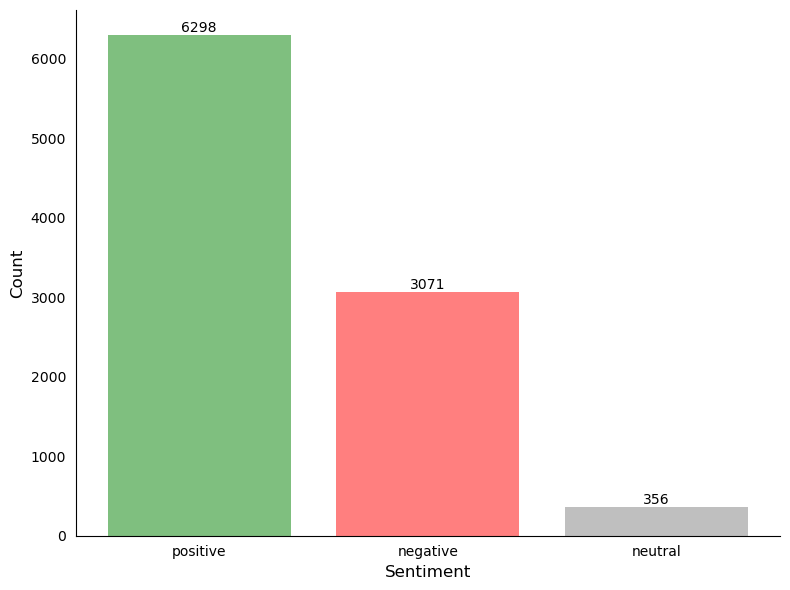

In [13]:
sentiment_counts = gpt3['gpt3_simple_sentiment'].value_counts()

# Define colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index], alpha = 0.5)  # Adjust bar colors
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks
plt.tick_params(axis='y', which='both', left=False)  # Remove y-axis ticks
plt.xlabel('Sentiment', fontsize=12)  # Add labels with increased font size
plt.ylabel('Count', fontsize=12)
#plt.title('Sentiment Distribution', fontweight='bold', fontsize=14)  # Add title with increased font size

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show();

In [15]:
true_values = gpt3['sentiment']
predicted_values = gpt3['gpt3_simple_sentiment']

# Calculate accuracy
accuracy_gpt3 = accuracy_score(true_values, predicted_values)

# Calculate precision, recall, and F1-score for each class
precision_gpt3 = precision_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
recall_gpt3 = recall_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
f1_gpt3 = f1_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])

# Calculate overall precision, recall, and F1-score
precision_macro_gpt3 = precision_score(true_values, predicted_values, average='macro')
recall_macro_gpt3 = recall_score(true_values, predicted_values, average='macro')
f1_macro_gpt3 = f1_score(true_values, predicted_values, average='macro')

# Print the results
print("Accuracy:", accuracy_gpt3)
print("Precision (positive, negative, neutral):", precision_gpt3)
print("Recall (positive, negative, neutral):", recall_gpt3)
print("F1-score (positive, negative, neutral):", f1_gpt3)
print("Overall Precision:", precision_macro_gpt3)
print("Overall Recall:", recall_macro_gpt3)
print("Overall F1-score:", f1_macro_gpt3)

Accuracy: 0.6717737789203084
Precision (positive, negative, neutral): [0.65211178 0.75871052 0.26966292]
Recall (positive, negative, neutral): [0.90582267 0.61493798 0.06847361]
F1-score (positive, negative, neutral): [0.75830871 0.67930029 0.10921502]
Overall Precision: 0.5601617402043064
Overall Recall: 0.529744753541508
Overall F1-score: 0.5156080078429316


In [17]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(pd.Series(true_values, name='Actual'), pd.Series(predicted_values, name='Predicted'))

print("Confusion Matrix:")
print(confusion_matrix)

# Perform the Chi-Squared Test
chi2, p, dof, ex = chi2_contingency(confusion_matrix)

print("\nChi-Squared Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Your model's predictions are significantly different from random chance.")
else:
    print("Fail to reject the null hypothesis. Your model's predictions are not significantly different from random chance.")


Confusion Matrix:
Predicted  negative  neutral  positive
Actual                                
negative       2330      177      1282
neutral         397       96       909
positive        344       83      4107

Chi-Squared Test Statistic: 3022.264834903556
Degrees of Freedom: 4
P-value: 0.0
Reject the null hypothesis. Your model's predictions are significantly different from random chance.


In [18]:
# Permutation test 
# Calculate the observed accuracy
observed_accuracy = accuracy_score(true_values, predicted_values)
print("Observed Accuracy:", observed_accuracy)

# Number of permutations
n_permutations = 1000

# Array to store permutation accuracies
permutation_accuracies = np.zeros(n_permutations)

# Perform permutations
for i in range(n_permutations):
    # Shuffle the true labels
    shuffled_true = np.random.permutation(true_values)
    # Calculate accuracy with shuffled labels
    perm_acc = accuracy_score(shuffled_true, predicted_values)
    permutation_accuracies[i] = perm_acc

# Calculate p-value
p_value = np.mean(permutation_accuracies >= observed_accuracy)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Model's accuracy is significantly better than chance.")
else:
    print("Fail to reject the null hypothesis. Model's accuracy is not significantly better than chance.")


Observed Accuracy: 0.6717737789203084
P-value: 0.0
Reject the null hypothesis. Model's accuracy is significantly better than chance.


## Llama

In [19]:
llama = pd.read_csv('llama_checked.csv')
#filter outliers
llama = llama[(llama['llama_simple'].str.len() >33) & (llama['llama_simple'].str.len() < 535)]
llama = llama[llama['llama_simple'].notna()]
llama.head()

,id,author_id,in_reply_to_user_id,quoted_user_id,retweeted_user_id,text,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,entities.hashtags,entities.mentions,author.username,author.name,author.description,author.location,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,url,link_text,party,name,Occupation(s),Education,Residence[5],sentiment,age,gender,llama_simple,bert__simple_sentiment,text_bert_class,llama_simple_gpt_label,llama_age,llama_name,llama_arguing,simple_tweet_true
1,1.320739e+18,1.580876e+07,NaN,NaN,NaN,It's no secret what Donald Trump and Senate Re...,1494.0,67.0,264.0,323.0,NaN,NaN,CoryBooker,Cory Booker,U.S. Senator from New Jersey. Most tweets (and...,"Newark, NJ",4835171.0,85102.0,67749.0,https://thehill.com/homenews/administration/52...,President Trump says in an interview with “60 ...,Democrat,Cory Booker,Lawyer,"Stanford University (BA, MA) Queen's College, ...",Newark,negative,55.0,male,Donald Trump just revealed his true intentions...,negative,negative,negative,"""Its appalling that @realDonaldTrump is still ...",Biden also emphasized his commitment to build...,NaN,True
2,9.986146e+17,1.574537e+07,NaN,NaN,NaN,Some #Florida elections officials didn’t like ...,259.0,19.0,105.0,112.0,"[{""start"": 5, ""end"": 13, ""tag"": ""Florida""}, {""...","[{""start"": 77, ""end"": 82, ""username"": ""wapo"", ...",marcorubio,Marco Rubio,"Christian,Husband,Father,AMERICAN,Senator for ...",United States,4521052.0,2544.0,16594.0,https://www.washingtonpost.com/news/powerpost/...,Comment on this story Comment Gift Article Sha...,Republican,Marco Rubio,Lawyer,University of Florida (BA) University of Miami...,West Miami[13],neutral,53.0,male,I hope it’s not just a summit to turn a blind ...,negative,negative,negative,Share on Facebook Tweet Share on Twitter Share...,"ift ArticleShareAs a U.S. senator, I am deeply...",TWEET SHAREFollow us @CyberwaarWant to learn ...,False
3,9.550850e+17,1.321810e+07,NaN,NaN,NaN,"One woman, two marches: Can women who oppose a...",14.0,7.0,61.0,9.0,NaN,NaN,JohnCornyn,Senator John Cornyn,"Mainly news I find interesting, pics, and opin...","Austin, Texas",365745.0,12988.0,55006.0,https://www.dallasnews.com/opinion/commentary/...,Rachel Lamb saw as much fate as coincidence in...,Republican,John Cornyn,Lawyer,"Trinity University (BA) St. Mary's University,...",Austin,neutral,72.0,male,When I mapped out the routes for these marches...,neutral,neutral,negative,"""Proud to see citizens like Rachel Lamb promot...","We did not always agree, but for one afternoo...",Thats the real #WomensMarch.,False
4,1.255486e+18,1.080961e+18,NaN,NaN,NaN,The coronavirus pandemic continues to highligh...,8.0,1.0,1.0,2.0,NaN,"[{""start"": 231, ""end"": 235, ""username"": ""FTC"",...",SenHawleyPress,Senator Hawley Press Office,Tweets from the office of U.S. Senator Josh Ha...,Missouri,58953.0,857.0,4437.0,https://www.kfvs12.com/2020/04/29/sen-hawley-c...,WASHINGTON D.C. (KFVS) - U.S. Senators Josh Ha...,Republican,Josh Hawley,Lawyer Professor,Stanford University (BA) Yale University (JD),Ozark,neutral,44.0,male,"Agreeing with @SenHawley & @SenBaldwin, we nee...",negative,negative,neutral,Read more at: https://www.kfvs12.com/2020/04/...,NaN,"""As a Republican, I stand with @HawleyMO & @Se...",True
5,1.560321e+18,1.500790e+08,NaN,NaN,NaN,SEVEN BILLION DOLLARS\n\nThis is not amateur s...,937.0,9.0,49.0,229.0,NaN,NaN,ChrisMurphyCT,Chris Murphy,U.S. Senator from Connecticut.,NaN,1099209.0,267.0,29268.0,https://www.espn.com/college-football/story/_/...,The Big Ten has completed a new seven-year med...,Democrat,Chris Murphy,Lawyer Political campaign manager,"Williams College (BA) Exeter College, Oxford U...",Hartford[12],negative,50.0,male,"""Congratulations to the Big Ten on their new $...",positive,negative,positive,NaN,NBC and Peacock will broadcast Notre Dames me...,Every mens and womens basketball game will 

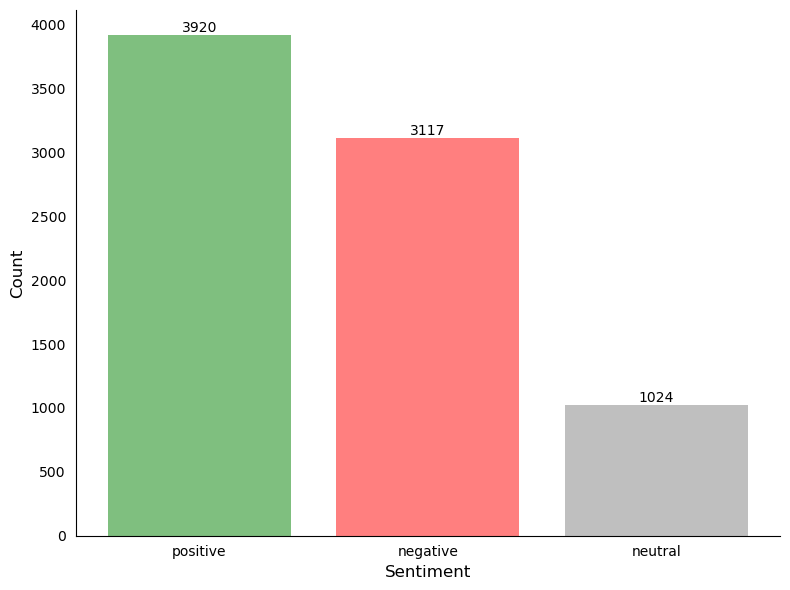

In [20]:
sentiment_counts = llama['llama_simple_gpt_label'].value_counts()

# Define colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index], alpha = 0.5)  # Adjust bar colors
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks
plt.tick_params(axis='y', which='both', left=False)  # Remove y-axis ticks
plt.xlabel('Sentiment', fontsize=12)  # Add labels with increased font size
plt.ylabel('Count', fontsize=12)
#plt.title('Sentiment Distribution', fontweight='bold', fontsize=14)  # Add title with increased font size

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show();

In [21]:
true_values = llama['sentiment'].astype('str')
predicted_values = llama['llama_simple_gpt_label']

# Calculate accuracy
accuracy_llama = accuracy_score(true_values, predicted_values)

# Calculate precision, recall, and F1-score for each class
precision_llama = precision_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
recall_llama = recall_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
f1_llama = f1_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])

# Calculate overall precision, recall, and F1-score
precision_macro_llama = precision_score(true_values, predicted_values, average='macro')
recall_macro_llama = recall_score(true_values, predicted_values, average='macro')
f1_macro_llama = f1_score(true_values, predicted_values, average='macro')

# Print the results
print("Accuracy:", accuracy_llama)
print("Precision (positive, negative, neutral):", precision_llama)
print("Recall (positive, negative, neutral):", recall_llama)
print("F1-score (positive, negative, neutral):", f1_llama)
print("Overall Precision:", precision_macro_llama)
print("Overall Recall:", recall_macro_llama)
print("Overall F1-score:", f1_macro_llama)

Accuracy: 0.6127031385684159
Precision (positive, negative, neutral): [0.69668367 0.64773821 0.18457031]
Recall (positive, negative, neutral): [0.71755123 0.65915769 0.15855705]
F1-score (positive, negative, neutral): [0.7069635  0.65339806 0.17057762]
Overall Precision: 0.5096640652621732
Overall Recall: 0.5117553234709291
Overall F1-score: 0.5103130584838379


In [23]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(pd.Series(true_values, name='Actual'), pd.Series(predicted_values, name='Predicted'))

print("Confusion Matrix:")
print(confusion_matrix)

# Perform the Chi-Squared Test
chi2, p, dof, ex = chi2_contingency(confusion_matrix)

print("\nChi-Squared Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Your model's predictions are significantly different from random chance.")
else:
    print("Fail to reject the null hypothesis. Your model's predictions are not significantly different from random chance.")


Confusion Matrix:
Predicted  negative  neutral  positive
Actual                                
negative       2019      395       649
neutral         463      189       540
positive        635      440      2731

Chi-Squared Test Statistic: 1972.7173476032685
Degrees of Freedom: 4
P-value: 0.0
Reject the null hypothesis. Your model's predictions are significantly different from random chance.


## Mistral

In [25]:
mist = pd.read_csv('mistral_merged.csv')

#filter 
#mist = mist[(mist['mistral_simple'].str.len() > 136) & (mist['mistral_simple'].str.len() < 532)]
#mist = mist[mist['mistral_simple'].notna()]

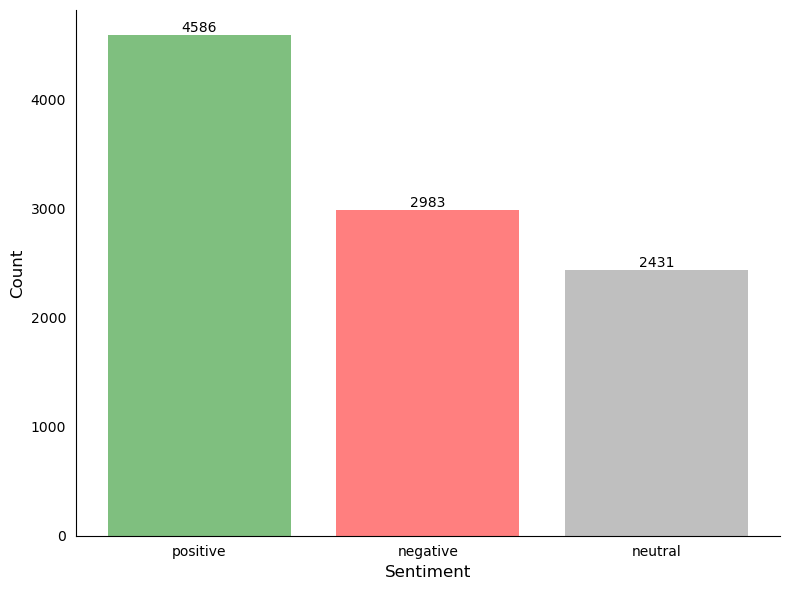

In [26]:
sentiment_counts = mist['mistral_simple_gpt_label'].value_counts()

# Define colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index], alpha = 0.5)  # Adjust bar colors
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks
plt.tick_params(axis='y', which='both', left=False)  # Remove y-axis ticks
plt.xlabel('Sentiment', fontsize=12)  # Add labels with increased font size
plt.ylabel('Count', fontsize=12)
#plt.title('Sentiment Distribution', fontweight='bold', fontsize=14)  # Add title with increased font size

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show();

In [27]:
true_values = mist['gpt_sentiment'].astype('str')
predicted_values = mist['mistral_simple_gpt_label']

# Calculate accuracy
accuracy_mist = accuracy_score(true_values, predicted_values)

# Calculate precision, recall, and F1-score for each class
precision_mist = precision_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
recall_mist = recall_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])
f1_mist = f1_score(true_values, predicted_values, average=None, labels=['positive', 'negative', 'neutral'])

# Calculate overall precision, recall, and F1-score
precision_macro_mist = precision_score(true_values, predicted_values, average='macro')
recall_macro_mist = recall_score(true_values, predicted_values, average='macro')
f1_macro_mist = f1_score(true_values, predicted_values, average='macro')

# Print the results
print("Accuracy:", accuracy_mist)
print("Precision (positive, negative, neutral):", precision_mist)
print("Recall (positive, negative, neutral):", recall_mist)
print("F1-score (positive, negative, neutral):", f1_mist)
print("Overall Precision:", precision_macro_mist)
print("Overall Recall:", recall_macro_mist)
print("Overall F1-score:", f1_macro_mist)

Accuracy: 0.5724
Precision (positive, negative, neutral): [0.69406891 0.69225612 0.1958042 ]
Recall (positive, negative, neutral): [0.68599138 0.52759325 0.32918396]
F1-score (positive, negative, neutral): [0.6900065  0.59881108 0.24555068]
Overall Precision: 0.5273764063901196
Overall Recall: 0.5142561966774776
Overall F1-score: 0.5114560880527435


In [28]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(pd.Series(true_values, name='Actual'), pd.Series(predicted_values, name='Predicted'))

print("Confusion Matrix:")
print(confusion_matrix)

# Perform the Chi-Squared Test
chi2, p, dof, ex = chi2_contingency(confusion_matrix)

print("\nChi-Squared Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Your model's predictions are significantly different from random chance.")
else:
    print("Fail to reject the null hypothesis. Your model's predictions are not significantly different from random chance.")


Confusion Matrix:
Predicted  negative  neutral  positive
Actual                                
negative       2065     1046       803
neutral         370      476       600
positive        548      909      3183

Chi-Squared Test Statistic: 2376.983072116957
Degrees of Freedom: 4
P-value: 0.0
Reject the null hypothesis. Your model's predictions are significantly different from random chance.
